In [1]:
# 数据预处理分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# 添加src目录到Python路径
project_path = Path("D:/VSCodeProjects/PythonCourse")
src_path = project_path / "src"
sys.path.append(str(src_path))

# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🎬 电影数据预处理分析")
print("=" * 50)

🎬 电影数据预处理分析


开始数据预处理流程
加载原始数据...
数据加载完成:
 - Movies: (9742, 3)
 - Ratings: (100836, 4)
 - Links: (9742, 3)
 - Tags: (3683, 4)

检查缺失值...
movies: 无缺失值
ratings: 无缺失值
links 缺失值:
 - tmdbId: 8 (0.08%)
tags: 无缺失值

处理缺失值...
   - 填充电影年份缺失值: 1999.0
   - 填充外部链接ID缺失值为0

检查重复值...
 - Movies重复行: 0
 - Ratings重复行: 0
 - Links重复行: 0
 - Tags重复行: 0

处理重复值...
 - 移除重复评分记录: 0 条
 - 移除重复标签记录: 0 条
 - 确保movies和links的movieId唯一

处理多用户评分问题...
 - 电影评分统计:
   平均每个电影评分数: 10.37
   评分最多的电影: 329 个评分
   评分最少的电影: 1 个评分


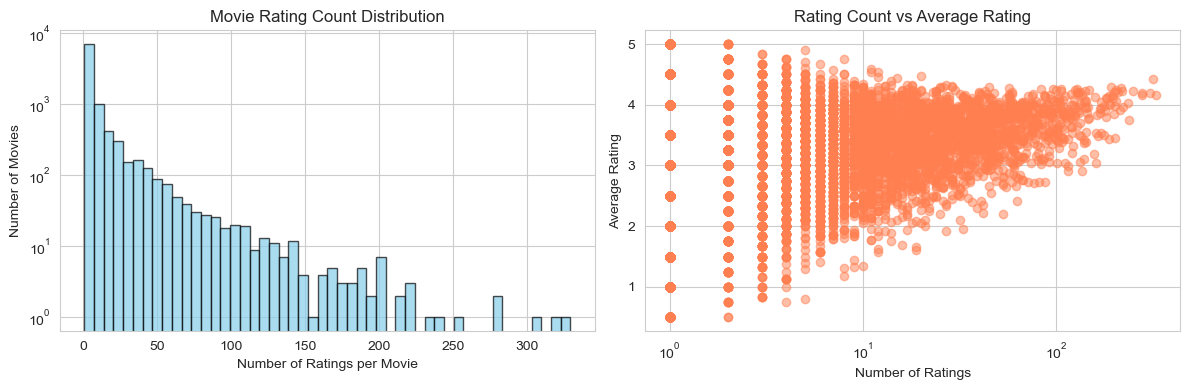


对电影类型进行编码...
 - 发现 20 种电影类型: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
 - 电影类型分布:
    Drama: 4361 部电影
    Comedy: 3756 部电影
    Thriller: 1894 部电影
    Action: 1828 部电影
    Romance: 1596 部电影
    Adventure: 1263 部电影
    Crime: 1199 部电影
    Sci-Fi: 980 部电影
    Horror: 978 部电影
    Fantasy: 779 部电影

创建电影特征数据集...
 - 创建特征数据集: (9742, 36)
 - 特征列: ['movieId', 'title', 'genres', 'year', 'genres_list', 'genre_Musical', 'genre_War', 'genre_Horror', 'genre_Comedy', 'genre_Film-Noir', 'genre_Romance', 'genre_Crime', 'genre_Animation', 'genre_Sci-Fi', 'genre_Children', 'genre_Thriller', 'genre_IMAX', 'genre_Adventure', 'genre_Western', 'genre_Documentary', 'genre_Action', 'genre_Drama', 'genre_(no genres listed)', 'genre_Fantasy', 'genre_Mystery', 'avg_rating', 'rating_count', 'rating_std', 'min_rating', 'max_rating',

In [2]:
# 导入预处理模块
from data_preprocessing import DataPreprocessor

# 初始化预处理器
preprocessor = DataPreprocessor()

# 运行完整预处理流程
summary = preprocessor.run_preprocessing_pipeline()

In [3]:
# 加载处理后的数据进行分析
processed_path = project_path / "data" / "processed"
movie_features = pd.read_csv(processed_path / "movie_features.csv")

print("📊 处理后的数据概览:")
print(f"电影特征数据集形状: {movie_features.shape}")
print("\n数据集列名:")
for i, col in enumerate(movie_features.columns, 1):
    print(f"{i:2d}. {col}")

print("\n前5行数据:")
display(movie_features.head())

📊 处理后的数据概览:
电影特征数据集形状: (9742, 36)

数据集列名:
 1. movieId
 2. title
 3. genres
 4. year
 5. genres_list
 6. genre_Musical
 7. genre_War
 8. genre_Horror
 9. genre_Comedy
10. genre_Film-Noir
11. genre_Romance
12. genre_Crime
13. genre_Animation
14. genre_Sci-Fi
15. genre_Children
16. genre_Thriller
17. genre_IMAX
18. genre_Adventure
19. genre_Western
20. genre_Documentary
21. genre_Action
22. genre_Drama
23. genre_(no genres listed)
24. genre_Fantasy
25. genre_Mystery
26. avg_rating
27. rating_count
28. rating_std
29. min_rating
30. max_rating
31. unique_users
32. first_rating_date
33. last_rating_date
34. rating_period_days
35. imdbId
36. tmdbId

前5行数据:


,movieId,title,genres,year,genres_list,genre_Musical,genre_War,genre_Horror,genre_Comedy,genre_Film-Noir,...,rating_count,rating_std,min_rating,max_rating,unique_users,first_rating_date,last_rating_date,rating_period_days,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"['Adventure', 'Animation', 'Children', 'Comedy...",0,0,0,1,0,...,215.0,0.835,0.5,5.0,215.0,829322340.0,1.535710e+09,8175.779236,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,"['Adventure', 'Children', 'Fantasy']",0,0,0,0,0,...,110.0,0.882,0.5,5.0,110.0,829322340.0,1.529902e+09,8108.557674,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,"['Comedy', 'Romance']",0,0,0,1,0,...,52.0,1.055,0.5,5.0,52.0,839317471.0,1.498505e+09,7629.486111,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"['Comedy', 'Drama', 'Romance']",0,0,0,1,0,...,7.0,0.852,1.0,3.0,7.0,835441653.0,1.237760e+09,4656.462986,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,['Comedy'],0,0,0,1,0,...,49.0,0.907,0.5,5.0,49.0,829322340.0,1.517441e+09,7964.340035,113041,11862.0


In [4]:
# 分析处理后的数据质量 - 改进版本
def analyze_processed_data(movie_features):
    """分析处理后的数据质量"""
    
    print("🔍 处理后的数据质量分析")
    print("=" * 50)
    
    # 检查缺失值
    missing_data = movie_features.isnull().sum()
    missing_percent = (missing_data / len(movie_features)) * 100
    
    missing_info = pd.DataFrame({
        'missing_count': missing_data,
        'missing_percent': missing_percent
    })
    
    missing_info = missing_info[missing_info['missing_count'] > 0]
    
    if len(missing_info) > 0:
        print("❌ 仍然存在的缺失值:")
        for col in missing_info.index:
            count = missing_info.loc[col, 'missing_count']
            percent = missing_info.loc[col, 'missing_percent']
            print(f"   - {col}: {count} ({percent:.2f}%)")
        
        # 分析缺失值的原因
        print("\n🔎 缺失值分析:")
        rating_related_cols = ['min_rating', 'max_rating', 'unique_users', 'first_rating_date', 'last_rating_date']
        missing_rating_cols = [col for col in rating_related_cols if col in missing_info.index]
        
        if missing_rating_cols:
            print(f"   这些缺失值来自 {len(missing_rating_cols)} 个评分相关列")
            print("   📝 原因: 这些电影在ratings.csv中没有评分记录")
            print("   💡 建议: 在建模前填充为0（表示无评分）")
    else:
        print("✅ 所有缺失值已处理完成")
    
    # 分析数值特征的分布
    numeric_cols = movie_features.select_dtypes(include=[np.number]).columns
    print(f"\n📈 数值特征统计 ({len(numeric_cols)} 个特征):")
    
    # 选择关键数值特征进行详细分析
    key_numeric = ['avg_rating', 'rating_count', 'rating_std', 'rating_period_days', 'year']
    key_numeric = [col for col in key_numeric if col in movie_features.columns]
    
    print(movie_features[key_numeric].describe().round(3))
    
    # 新增：数据质量评分
    print(f"\n⭐ 数据质量评分:")
    total_cells = movie_features.shape[0] * movie_features.shape[1]
    missing_cells = missing_data.sum()
    completeness = (1 - missing_cells / total_cells) * 100
    print(f"   数据完整性: {completeness:.2f}%")
    
    # 检查无评分的电影数量
    if 'rating_count' in movie_features.columns:
        no_rating_movies = (movie_features['rating_count'] == 0).sum()
        print(f"   无评分的电影: {no_rating_movies} 部 ({no_rating_movies/len(movie_features)*100:.2f}%)")
    
    return missing_info

# 使用改进版本
missing_info = analyze_processed_data(movie_features)

🔍 处理后的数据质量分析
✅ 所有缺失值已处理完成

📈 数值特征统计 (33 个特征):
       avg_rating  rating_count  rating_std  rating_period_days      year
count    9742.000      9742.000    9742.000            9742.000  9742.000
mean        3.256        10.351       0.541            2381.226  1994.619
std         0.880        22.385       0.510            2671.972    18.524
min         0.000         0.000       0.000               0.000  1902.000
25%         2.786         1.000       0.000               0.000  1988.000
50%         3.417         3.000       0.577            1179.807  1999.000
75%         3.909         9.000       0.928            4634.060  2008.000
max         5.000       329.000       3.182            8194.888  2018.000

⭐ 数据质量评分:
   数据完整性: 100.00%
   无评分的电影: 18 部 (0.18%)


📊 特征分布可视化


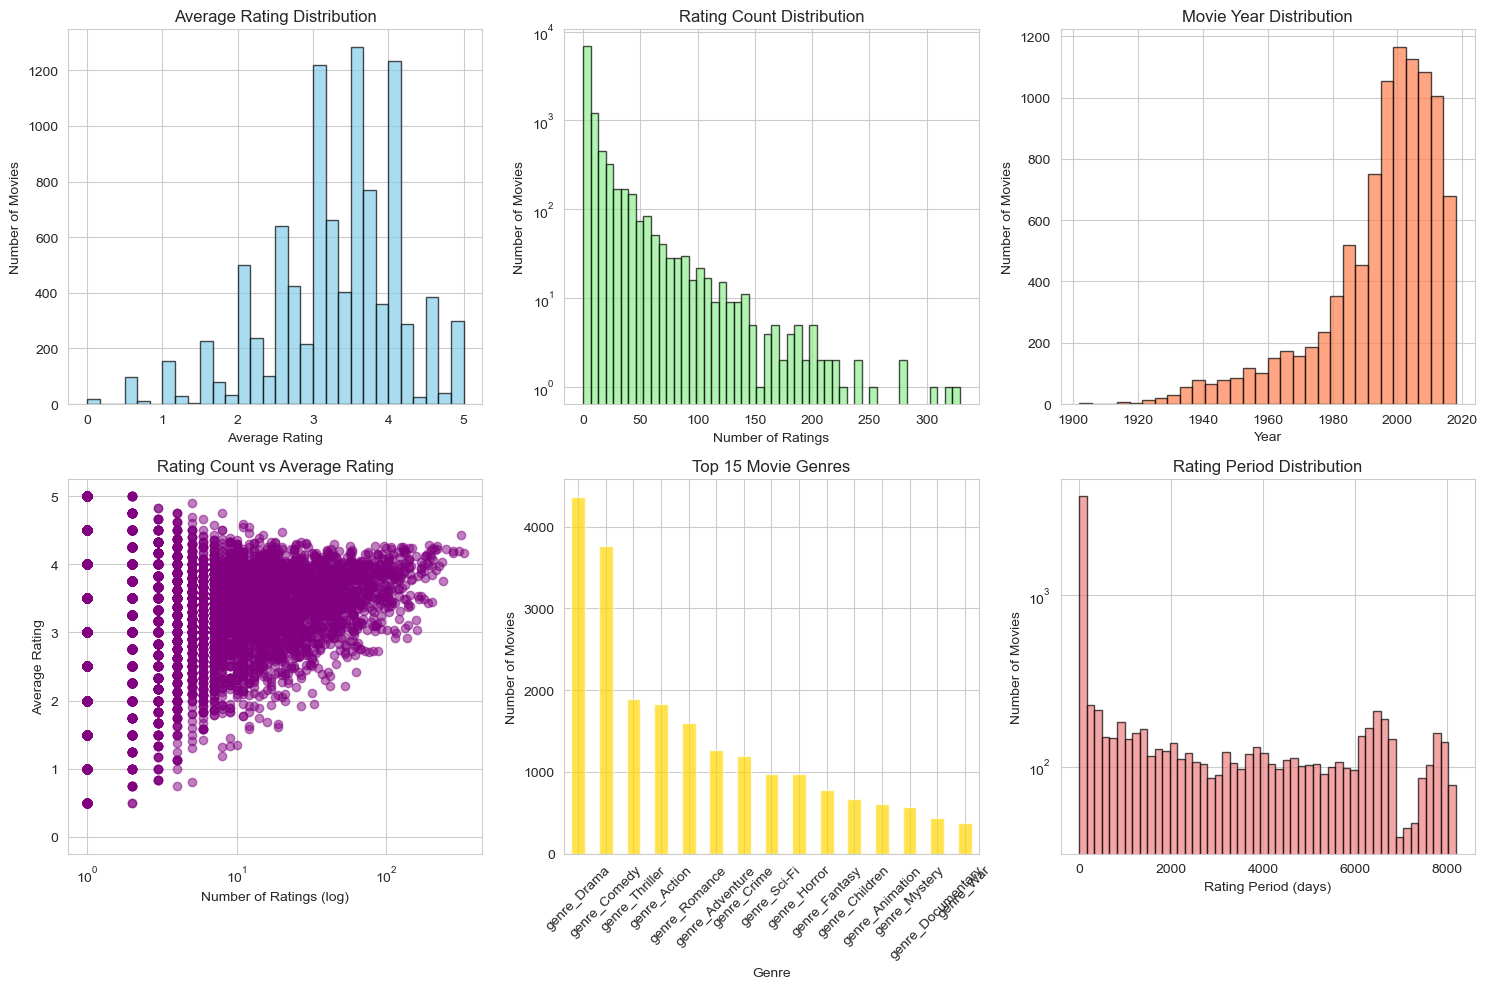

In [5]:
# 可视化处理后的特征分布
def visualize_processed_features(movie_features):
    """可视化处理后的特征分布"""
    
    print("📊 特征分布可视化")
    
    plt.figure(figsize=(15, 10))
    
    # 1. 平均评分分布
    plt.subplot(2, 3, 1)
    movie_features['avg_rating'].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Average Rating Distribution')
    plt.xlabel('Average Rating')
    plt.ylabel('Number of Movies')
    
    # 2. 评分数量分布
    plt.subplot(2, 3, 2)
    movie_features['rating_count'].hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Rating Count Distribution')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Number of Movies')
    plt.yscale('log')
    
    # 3. 电影年份分布
    plt.subplot(2, 3, 3)
    movie_features['year'].hist(bins=30, alpha=0.7, color='coral', edgecolor='black')
    plt.title('Movie Year Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    
    # 4. 评分数量 vs 平均评分
    plt.subplot(2, 3, 4)
    plt.scatter(movie_features['rating_count'], movie_features['avg_rating'], 
               alpha=0.5, color='purple')
    plt.title('Rating Count vs Average Rating')
    plt.xlabel('Number of Ratings (log)')
    plt.ylabel('Average Rating')
    plt.xscale('log')
    
    # 5. 电影类型数量分布
    plt.subplot(2, 3, 5)
    genre_cols = [col for col in movie_features.columns if col.startswith('genre_')]
    genre_counts = movie_features[genre_cols].sum().sort_values(ascending=False)
    genre_counts.head(15).plot(kind='bar', color='gold', alpha=0.7)
    plt.title('Top 15 Movie Genres')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    
    # 6. 评分时间跨度分布
    plt.subplot(2, 3, 6)
    movie_features['rating_period_days'].hist(bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    plt.title('Rating Period Distribution')
    plt.xlabel('Rating Period (days)')
    plt.ylabel('Number of Movies')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/processed_features_analysis.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_processed_features(movie_features)

🎭 电影类型特征分析 (共 20 种类型)

电影类型统计 (按数量排序):


,genre,count,avg_rating
16,Drama,4361,3.411492
3,Comedy,3756,3.179170
10,Thriller,1894,3.147788
15,Action,1828,3.094493
5,Romance,1596,3.354328
12,Adventure,1263,3.212672
6,Crime,1199,3.293586
8,Sci-Fi,980,3.102641
2,Horror,978,2.915986
18,Fantasy,779,3.214702


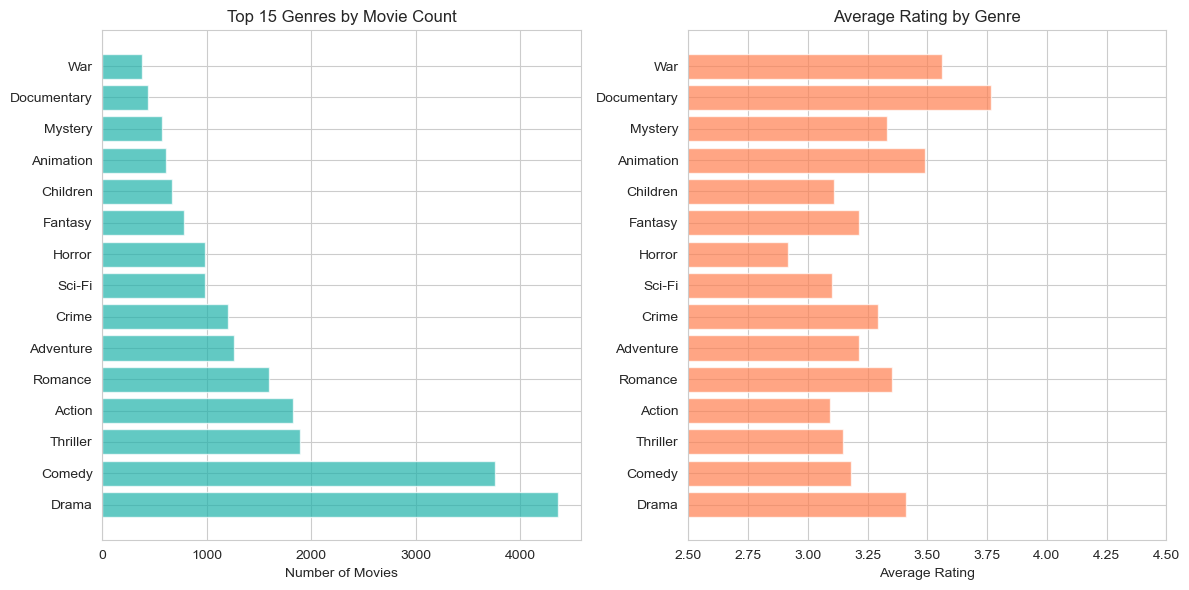

In [6]:
# 分析电影类型特征
def analyze_genre_features(movie_features):
    """分析电影类型特征"""
    
    genre_cols = [col for col in movie_features.columns if col.startswith('genre_')]
    print(f"🎭 电影类型特征分析 (共 {len(genre_cols)} 种类型)")
    
    # 计算每个类型的统计信息
    genre_stats = []
    for genre_col in genre_cols:
        genre_name = genre_col.replace('genre_', '')
        count = movie_features[genre_col].sum()
        avg_rating = movie_features.loc[movie_features[genre_col] == 1, 'avg_rating'].mean()
        genre_stats.append({
            'genre': genre_name,
            'count': count,
            'avg_rating': avg_rating
        })
    
    genre_stats_df = pd.DataFrame(genre_stats).sort_values('count', ascending=False)
    
    print("\n电影类型统计 (按数量排序):")
    display(genre_stats_df.head(10))
    
    # 可视化类型与评分的关系
    plt.figure(figsize=(12, 6))
    
    # 选择前15个最多的类型
    top_genres = genre_stats_df.head(15)
    
    plt.subplot(1, 2, 1)
    plt.barh(top_genres['genre'], top_genres['count'], color='lightseagreen', alpha=0.7)
    plt.title('Top 15 Genres by Movie Count')
    plt.xlabel('Number of Movies')
    
    plt.subplot(1, 2, 2)
    plt.barh(top_genres['genre'], top_genres['avg_rating'], color='coral', alpha=0.7)
    plt.title('Average Rating by Genre')
    plt.xlabel('Average Rating')
    plt.xlim(2.5, 4.5)  # 统一评分范围
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/genre_analysis.png", 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return genre_stats_df

genre_stats = analyze_genre_features(movie_features)

In [7]:
# 保存预处理总结报告
def create_preprocessing_summary(movie_features, summary):
    """创建预处理总结报告"""
    
    report_path = project_path / "results" / "preprocessing_summary.txt"
    
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write("电影数据预处理总结报告\n")
        f.write("=" * 50 + "\n\n")
        
        f.write("1. 数据概览:\n")
        f.write(f"   - 电影特征数据集: {movie_features.shape}\n")
        f.write(f"   - 特征数量: {len(movie_features.columns)}\n")
        f.write(f"   - 电影数量: {len(movie_features)}\n\n")
        
        f.write("2. 特征类型:\n")
        numeric_cols = movie_features.select_dtypes(include=[np.number]).columns
        categorical_cols = movie_features.select_dtypes(include=['object']).columns
        f.write(f"   - 数值特征: {len(numeric_cols)}\n")
        f.write(f"   - 分类特征: {len(categorical_cols)}\n\n")
        
        f.write("3. 关键特征统计:\n")
        key_features = ['avg_rating', 'rating_count', 'year']
        for feature in key_features:
            if feature in movie_features.columns:
                stats = movie_features[feature].describe()
                f.write(f"   - {feature}: mean={stats['mean']:.2f}, std={stats['std']:.2f}\n")
        
        f.write(f"\n4. 电影类型: {len([col for col in movie_features.columns if col.startswith('genre_')])} 种\n")
        
        f.write("\n5. 数据质量:\n")
        missing_total = movie_features.isnull().sum().sum()
        f.write(f"   - 总缺失值: {missing_total}\n")
        f.write(f"   - 数据完整性: {(1 - missing_total/(movie_features.shape[0]*movie_features.shape[1]))*100:.2f}%\n")
    
    print(f"✅ 预处理总结报告已保存: {report_path}")

create_preprocessing_summary(movie_features, summary)

✅ 预处理总结报告已保存: D:\VSCodeProjects\PythonCourse\results\preprocessing_summary.txt
